In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.cluster import KMeans

In [2]:
# it read in BGR format instead of RGB format
img = cv2.imread('rohit1.png')

# convert BGR to RGB format
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [3]:
img.shape

(675, 1200, 3)

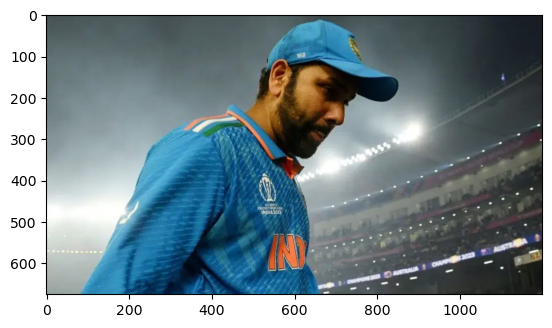

In [4]:
plt.imshow(img)
plt.show()

# Finding clusters

In [5]:
X = img.reshape(-1,3)
print(X.shape)

(810000, 3)


In [6]:
k =10
model = KMeans(n_clusters=10)
model.fit(X)

/home/gulshan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10)

In [7]:
centroids = model.cluster_centers_

In [8]:
print(centroids)

[[ 27.70524829  30.38434649  31.97845389]
 [ 69.41875574 155.25761967 193.4767908 ]
 [ 87.17646266  98.83567505 101.10348928]
 [164.56054306 178.03054104 180.4401796 ]
 [ 10.3662781   72.45261783 112.21927444]
 [224.90309733 231.25451076 229.88301656]
 [ 60.87828844  64.18998262  63.71377932]
 [120.64292206 133.91502932 136.6036578 ]
 [180.70106639 113.19715957  56.02525923]
 [ 30.58208864 110.80260546 153.81748068]]


In [9]:
colors = np.array(centroids, dtype= 'uint8')

In [10]:
print(colors)

[[ 27  30  31]
 [ 69 155 193]
 [ 87  98 101]
 [164 178 180]
 [ 10  72 112]
 [224 231 229]
 [ 60  64  63]
 [120 133 136]
 [180 113  56]
 [ 30 110 153]]


# Dominenet color swatches

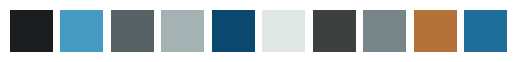

In [11]:
i =1
for color in colors:
    plt.subplot(1,k,i)
    plt.axis('off')
    i = i + 1
    mat = np.zeros((100,100,3),dtype = 'uint8')
    mat[:,:,:]=color
    plt.imshow(mat)
plt.show()

# Image in K-colors

In [12]:
np.unique(model.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [13]:
model.labels_.shape

(810000,)

In [14]:
newImg = np.zeros((X.shape),dtype = 'uint8')
print(newImg.shape)

(810000, 3)


In [15]:
for i in range(newImg.shape[0]):
    newImg[i] = colors[model.labels_[i]]

In [16]:
newImg = newImg.reshape(img.shape)

In [17]:
print(newImg.shape)

(675, 1200, 3)


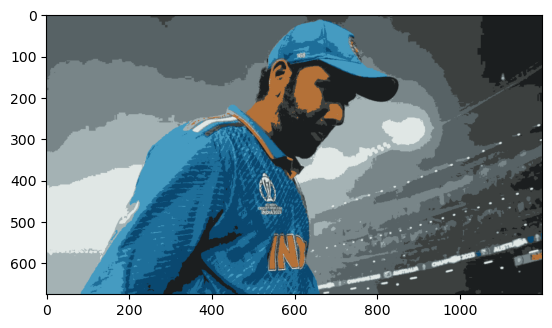

In [18]:
plt.imshow(newImg)